# [AMPLab] report: music analysis
## Nightwish - Ghost Love Score
Notebook created by Philip Tovstogan

In [2]:
# Essentia init
import essentia.standard as es
stats = ['mean', 'stdev']
sample_rate = 44100
lowlevel_hop_size = 1024
music_extractor = es.MusicExtractor(lowlevelStats=stats, rhythmStats=stats, tonalStats=stats, 
                                    lowlevelHopSize=lowlevel_hop_size)

In [4]:
# Extraction
features_stats, features_frame = music_extractor('audio.mp3')

In [6]:
# Export
es.YamlOutput(format='json', filename='stats.json')(features_stats)
es.YamlOutput(format='json', filename='frames.json')(features_frame)

In [7]:
# Import
features_frame = es.YamlInput(filename='frames.json', format='json')()

In [9]:
print(sorted(features_frame.descriptorNames()))

['lowlevel.average_loudness', 'lowlevel.barkbands', 'lowlevel.barkbands_crest', 'lowlevel.barkbands_flatness_db', 'lowlevel.barkbands_kurtosis', 'lowlevel.barkbands_skewness', 'lowlevel.barkbands_spread', 'lowlevel.dissonance', 'lowlevel.dynamic_complexity', 'lowlevel.erbbands', 'lowlevel.erbbands_crest', 'lowlevel.erbbands_flatness_db', 'lowlevel.erbbands_kurtosis', 'lowlevel.erbbands_skewness', 'lowlevel.erbbands_spread', 'lowlevel.gfcc', 'lowlevel.hfc', 'lowlevel.loudness_ebu128.integrated', 'lowlevel.loudness_ebu128.loudness_range', 'lowlevel.loudness_ebu128.momentary', 'lowlevel.loudness_ebu128.short_term', 'lowlevel.melbands', 'lowlevel.melbands128', 'lowlevel.melbands_crest', 'lowlevel.melbands_flatness_db', 'lowlevel.melbands_kurtosis', 'lowlevel.melbands_skewness', 'lowlevel.melbands_spread', 'lowlevel.mfcc', 'lowlevel.pitch_salience', 'lowlevel.silence_rate_20dB', 'lowlevel.silence_rate_30dB', 'lowlevel.silence_rate_60dB', 'lowlevel.spectral_centroid', 'lowlevel.spectral_comp

In [12]:
audio = es.MonoLoader(filename='audio.mp3', sampleRate=sample_rate)()

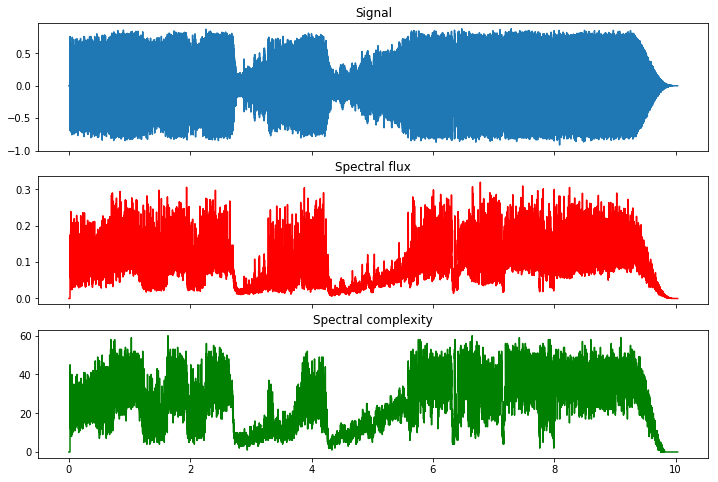

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

f, ax = plt.subplots(3, sharex=True, figsize=[12,8])

frame_x = np.arange(len(features_frame['lowlevel.spectral_flux'])) / sample_rate * lowlevel_hop_size / 60
audio_x = np.arange(len(audio)) / sample_rate / 60

ax[0].plot(audio_x, audio)
ax[0].set_title('Signal')

ax[1].plot(frame_x, features_frame['lowlevel.spectral_flux'], 'r')
ax[1].set_title('Spectral flux')

ax[2].plot(frame_x, features_frame['lowlevel.spectral_complexity'], 'g')
ax[2].set_title('Spectral complexity')

plt.savefig('overview.png', bbox_inches='tight')

Text(0.5,1,'Signal')

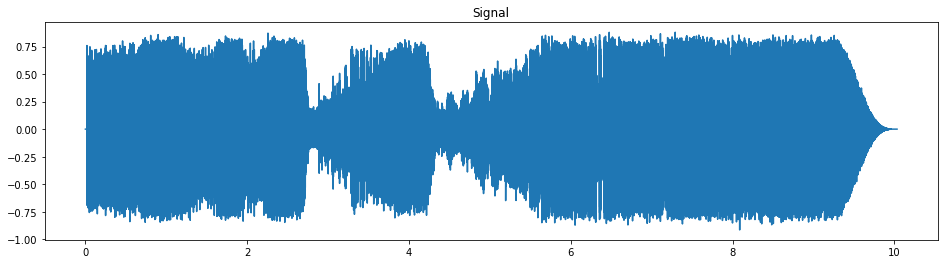

In [20]:
# Plot signal alone
f, ax = plt.subplots(1, figsize=[16,4])
ax.plot(audio_x, audio)
ax.set_title('Signal')